In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
#!pip install yfinance

In [4]:
import yfinance as yf
stock_symbol = 'AAPL'


In [5]:
start = '2013-01-01'
end = '2023-06-08'
df = yf.download(tickers = stock_symbol, start = start, end=end )

[*********************100%***********************]  1 of 1 completed


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-01,177.699997,180.119995,176.929993,180.089996,180.089996,68901800
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600


In [7]:
df = df.reset_index()

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.813862,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.601633,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.139200,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.044262,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.087446,458707200


In [9]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


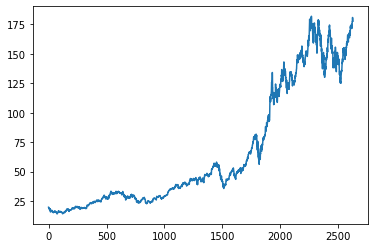

In [10]:
plt.plot(df.Close)

In [11]:
df

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200
...,...,...,...,...,...
2621,177.699997,180.119995,176.929993,180.089996,68901800
2622,181.029999,181.779999,179.259995,180.949997,61945900
2623,182.630005,184.949997,178.039993,179.580002,121946500
2624,179.970001,180.119995,177.429993,179.210007,64848400


In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2621    157.5576
2622    158.0656
2623    158.5541
2624    159.0113
2625    159.4554
Name: Close, Length: 2626, dtype: float64

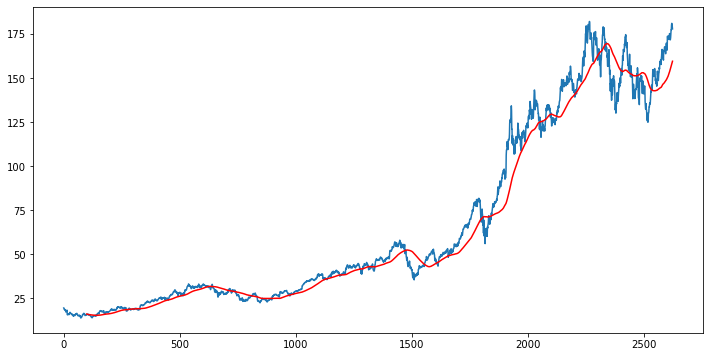

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2621    152.42515
2622    152.46475
2623    152.48990
2624    152.51520
2625    152.54670
Name: Close, Length: 2626, dtype: float64

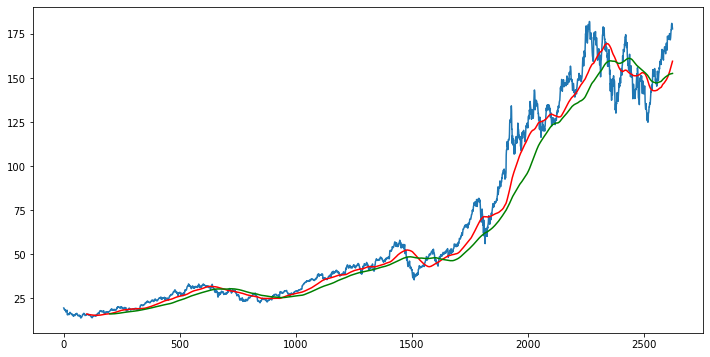

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200, 'green')


In [16]:
df.shape

(2626, 5)

In [18]:
#splitting data into training and testing       

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1838, 1)
(788, 1)


In [19]:
data_training.head() 


,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [20]:
data_testing.head()

,Close
1838,69.025002
1839,68.757500
1840,70.742500
1841,70.792503
1842,69.644997


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)  
data_training_array


array([[0.08342674],
       [0.07977913],
       [0.07183122],
       ...,
       [0.83640978],
       [0.814782  ],
       [0.78324301]])

In [23]:
x_train = []                    
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [24]:
# ml model       
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential


In [25]:
model = Sequential() 

In [26]:
from keras.layers import Dense      
from keras.layers import LSTM
from keras.layers import Dropout

In [27]:
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [28]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
55/55 [==============================] - 26s 322ms/step - loss: 0.0313
Epoch 2/50
55/55 [==============================] - 15s 263ms/step - loss: 0.0059
Epoch 3/50
55/55 [==============================] - 14s 259ms/step - loss: 0.0055
Epoch 4/50
55/55 [==============================] - 18s 321ms/step - loss: 0.0050
Epoch 5/50
55/55 [==============================] - 14s 246ms/step - loss: 0.0047
Epoch 6/50
55/55 [==============================] - 17s 306ms/step - loss: 0.0047
Epoch 7/50
55/55 [==============================] - 13s 238ms/step - loss: 0.0047
Epoch 8/50
55/55 [==============================] - 13s 235ms/step - loss: 0.0043
Epoch 9/50
55/55 [==============================] - 13s 227ms/step - loss: 0.0043
Epoch 10/50
55/55 [==============================] - 14s 256ms/step - loss: 0.0042
Epoch 11/50
55/55 [==============================] - 15s 270ms/step - loss: 0.0038
Epoch 12/50
55/55 [==============================] - 13s 242ms/step - loss: 0.0032
Epoch 13/50
5

In [30]:
model.save('keras_model.h5') 

In [31]:
data_testing.head()  

,Close
1838,69.025002
1839,68.757500
1840,70.742500
1841,70.792503
1842,69.644997


In [32]:
past_100_days = data_training.tail(100)  

In [33]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\anant\AppData\Local\Temp\ipykernel_14408\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [34]:
final_df.head()

,Close
0,66.072502
1,66.959999
2,66.812500
3,66.040001
4,64.862503


In [35]:
input_data = scaler.fit_transform(final_df) 
input_data

array([[0.07925827],
       [0.08630652],
       [0.08513512],
       [0.07900016],
       [0.06964881],
       [0.0741954 ],
       [0.08181943],
       [0.09200468],
       [0.08447996],
       [0.08757722],
       [0.0921238 ],
       [0.09349375],
       [0.10081998],
       [0.11017133],
       [0.11126335],
       [0.10993309],
       [0.110489  ],
       [0.10933748],
       [0.11839102],
       [0.11892707],
       [0.1301249 ],
       [0.12990648],
       [0.13332141],
       [0.13755038],
       [0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.192

In [36]:
input_data.shape  

(888, 1)

In [37]:
x_test = []                   
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)  
print(x_test.shape)
print(y_test.shape)

(788, 100, 1)
(788,)


In [39]:
# making predictions              
 
y_predicted = model.predict(x_test)

25/25 [==============================] - 2s 64ms/step


In [40]:
y_predicted.shape 

(788, 1)

In [41]:
y_test  

array([0.10270616, 0.10058174, 0.11634604, 0.11674315, 0.10762998,
       0.12579669, 0.13784818, 0.12845715, 0.13657754, 0.14531341,
       0.15140868, 0.15758333, 0.17027024, 0.17995914, 0.17281159,
       0.16534636, 0.16909885, 0.16546548, 0.17985983, 0.1762464 ,
       0.18833764, 0.18361231, 0.1876626 , 0.18337407, 0.18611391,
       0.1863919 , 0.18577642, 0.19353945, 0.19649772, 0.20003177,
       0.1944726 , 0.21269881, 0.21659023, 0.23749677, 0.25506781,
       0.22143467, 0.2271924 , 0.23551135, 0.25355887, 0.25258603,
       0.25286402, 0.24887329, 0.26703994, 0.28224831, 0.2694026 ,
       0.27889294, 0.25663632, 0.27281754, 0.2788135 , 0.27744355,
       0.27744355, 0.29678165, 0.29447855, 0.31171204, 0.31496817,
       0.31629838, 0.31278419, 0.32533211, 0.33063316, 0.32108326,
       0.31953463, 0.33565629, 0.32487544, 0.32703954, 0.29187765,
       0.29005103, 0.30748307, 0.2951139 , 0.30930969, 0.31844267,
       0.39841567, 0.41967958, 0.42545718, 0.428614  , 0.45911

In [42]:
y_predicted 

array([[0.11245054],
       [0.11574611],
       [0.11898634],
       [0.12208273],
       [0.1249775 ],
       [0.12762424],
       [0.1300554 ],
       [0.13237199],
       [0.13464269],
       [0.13692793],
       [0.13927144],
       [0.14175583],
       [0.144458  ],
       [0.14746171],
       [0.15081578],
       [0.15450597],
       [0.15847084],
       [0.16261655],
       [0.1668056 ],
       [0.17092805],
       [0.17488496],
       [0.17863989],
       [0.18216273],
       [0.18544453],
       [0.18846004],
       [0.19117945],
       [0.19360803],
       [0.19575045],
       [0.19763008],
       [0.19931048],
       [0.20086825],
       [0.20234822],
       [0.20385814],
       [0.20551953],
       [0.20748611],
       [0.20989566],
       [0.2127088 ],
       [0.21578401],
       [0.2189374 ],
       [0.22207506],
       [0.22511673],
       [0.22803965],
       [0.23090282],
       [0.2337997 ],
       [0.23680416],
       [0.23981409],
       [0.24284205],
       [0.245

In [43]:
scaler.scale_ 

array([0.00794171])

In [44]:
scale_factor = 1/0.00794171        
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

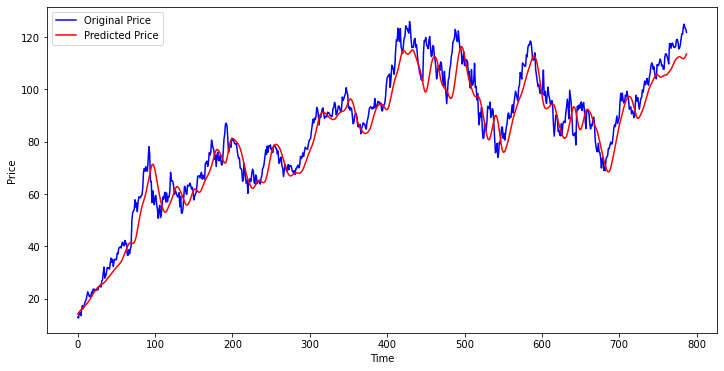

In [46]:
plt.figure(figsize=(12,6))                 
plt.plot(y_test , 'blue', label = 'Original Price')
plt.plot(y_predicted , 'red' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()